In [1]:
import pandas
import datetime
import numpy
import scipy.optimize
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
%matplotlib inline
from matplotlib import rcParams

In [2]:
# some constants and cutoffs
mincutOffLosVel = 50.
maxcutOffLosVel = 2000.
mincutOffspWdth = 0.
maxcutOffspWdth = 500.
minCutOffPwr = 3.
gridSizenormMLT = 0.5
gridSizeMLAT = 0.25
minNumPntsCutoffCell = 5 # Somewhat arbitrary determination!!

In [3]:
inpCols = [ "beam", "range", "geoAzm", "azimCalcMag", "magAzm", "vLos"\
           , "MLAT", "MLT", "MLON", "GLAT", "GLON", "radId"\
           , "radCode","normMLT", "normMLTRound", "spwdth", "pwr" ]
velsDataDF = pandas.read_csv("../data/apr9-840-losVels.txt")
velsDataDF.columns = inpCols
velsDataDF = velsDataDF[ (abs(velsDataDF["vLos"]) >= mincutOffLosVel) &\
                       (velsDataDF["spwdth"] >= mincutOffspWdth)&\
                       (velsDataDF["pwr"] >= minCutOffPwr)&\
                       (abs(velsDataDF["vLos"]) <= maxcutOffLosVel)&\
                       (velsDataDF["spwdth"] <= maxcutOffspWdth)].reset_index(drop=True)
velsDataDF.head()

,beam,range,geoAzm,azimCalcMag,magAzm,vLos,MLAT,MLT,MLON,GLAT,GLON,radId,radCode,normMLT,normMLTRound,spwdth,pwr
0,5,27,-41.65,-54.1307,-38.83,-378.1679,56.7707,2.5717,-18.7139,45.3710,-89.3080,33,bks,2.5717,2,108.6326,12.8346
1,5,28,-41.65,-54.7276,-39.16,-396.3842,57.0027,2.5290,-19.3536,45.6378,-89.7470,33,bks,2.5290,2,108.6326,9.4804
2,5,29,-41.65,-55.3287,-39.50,-379.2044,57.2309,2.4859,-20.0005,45.9024,-90.1899,33,bks,2.4859,2,108.6326,8.7086
3,5,30,-41.65,-55.9344,-39.85,-368.0763,57.4553,2.4423,-20.6546,46.1649,-90.6368,33,bks,2.4423,2,101.2517,7.1071
4,5,31,-41.65,-56.5449,-40.20,-321.3911,57.6758,2.3982,-21.3159,46.4254,-91.0877,33,bks,2.3982,2,93.0169,6.2654


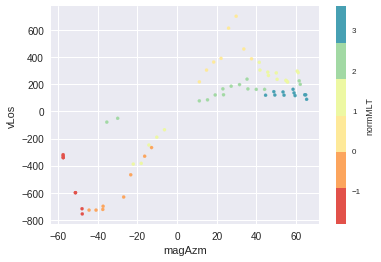

In [4]:
selLat = 58.5
delLat = 0.25
fig1 = plt.figure()
ax = fig1.add_subplot(111)
# Seaborn styling
sns.set_style("darkgrid")
sns.set_context("paper")
seaMap = ListedColormap(sns.color_palette("Spectral"))
velsDataDF[ (velsDataDF["MLAT"] >= (selLat-delLat) ) &\
          (velsDataDF["MLAT"] < (selLat+delLat) )].plot( kind='scatter',
              x='magAzm',
              y='vLos',
              c='normMLT',
              s=10., cmap=seaMap, ax=ax)
fig1.savefig("../figs/test2.pdf",bbox_inches='tight')

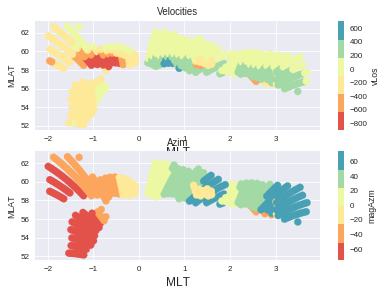

In [5]:
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
# Seaborn styling
sns.set_style("darkgrid")
sns.set_context("paper")
seaMap = ListedColormap(sns.color_palette("Spectral"))
# Plot using matplotlib
fig1 = plt.figure()
ax1 = fig1.add_subplot(211)
velsDataDF.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='vLos',
              s=50., cmap=seaMap, ax=ax1)
ax1.set_ylabel("MLAT")
ax1.set_xlabel("MLT", fontsize=12)
ax1.set_title( "Velocities" )
ax2 = fig1.add_subplot(212)
velsDataDF.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='magAzm',
              s=50., cmap=seaMap, ax=ax2)
ax2.set_ylabel("MLAT")
ax2.set_xlabel("MLT", fontsize=12)
ax2.set_title( "Azim" )
# ax.set_ylim( [55., 62.] )
fig1.savefig("../figs/lShellVelsAzims.pdf",bbox_inches='tight')
# ax.get_figure().savefig("../figs/sapsVels.pdf",bbox_inches='tight')
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####

In [6]:
# We'll work on a creating a grid.
minLat = round( velsDataDF["MLAT"].min() )
maxLat = round( velsDataDF["MLAT"].max() )
minnormMLT = round( velsDataDF["normMLT"].min() )
maxnormMLT = round( velsDataDF["normMLT"].max() )
print minLat, maxLat, minnormMLT, maxnormMLT
print "56.0959 60.3891"

52.0 63.0 -2.0 4.0
56.0959 60.3891


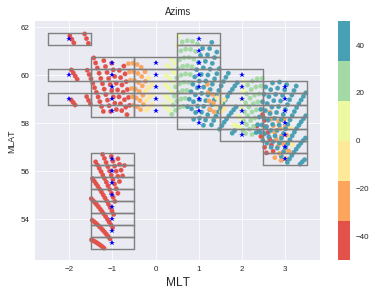

In [7]:
sns.set_style("darkgrid")
sns.set_context("paper")
seaMap = ListedColormap(sns.color_palette("Spectral"))
# Plot using matplotlib
fig1 = plt.figure()
ax = fig1.add_subplot(111)
# velsDataDF.plot( kind='scatter',
#               x='normMLT',
#               y='MLAT',
#               c='magAzm',
#               s=20., cmap=seaMap, ax=ax)
ax.set_ylabel("MLAT")
ax.set_xlabel("MLT", fontsize=12)
ax.set_title( "Azims" )

for la in numpy.arange( minLat, maxLat+1, gridSizeMLAT*2 ):
    for ml in numpy.arange( minnormMLT, maxnormMLT+1, gridSizenormMLT*2 ):
        dfSel = velsDataDF[ (velsDataDF["MLAT"] >= la - gridSizeMLAT) &\
                              (velsDataDF["MLAT"] < la + gridSizeMLAT) &\
                            (velsDataDF["normMLT"] >= ml - gridSizenormMLT) &\
                              (velsDataDF["normMLT"] < ml + gridSizenormMLT)]
        if dfSel.shape[0] > minNumPntsCutoffCell:
            im = ax.scatter( dfSel["normMLT"], dfSel["MLAT"], s=20.,\
                           c=dfSel["magAzm"], marker = 'o', cmap = seaMap, vmin=-50, vmax=50 )
            ax.plot( ml, la, 'b*' )
            ax.plot( [ ml - gridSizenormMLT, ml - gridSizenormMLT ], \
                [ la - gridSizeMLAT, la + gridSizeMLAT ], '0.5' )
            ax.plot( [ ml - gridSizenormMLT, ml+gridSizenormMLT ], \
                    [ la - gridSizeMLAT, la - gridSizeMLAT ], '0.5' )

            ax.plot( [ ml - gridSizenormMLT, ml+gridSizenormMLT ], \
                    [ la + gridSizeMLAT, la + gridSizeMLAT ], '0.5' )
            ax.plot( [ ml+gridSizenormMLT, ml+gridSizenormMLT ], \
                    [ la - gridSizeMLAT, la + gridSizeMLAT ], '0.5' )
fig1.colorbar(im)
fig1.savefig("../figs/lShellAzmisgridded.pdf",bbox_inches='tight')

In [8]:
# Some fitting functions
# Fit a sine curve for a given cell
def vel_sine_func(theta, Vmax, delTheta):
    # we are working in degrees but numpy deals with radians
    # convert to radians
    return Vmax * numpy.sin( numpy.deg2rad(theta) +\
                            numpy.deg2rad(delTheta) )

def model_func(theta, Vmax, delTheta):
    vLos = Vmax * numpy.sin( numpy.deg2rad(theta) +\
                            numpy.deg2rad(delTheta) )
    return vLos

initGuess = ( 1000., 10. )

     beam  range  geoAzm  azimCalcMag  magAzm      vLos     MLAT      MLT  \
172     2     21   23.22      16.2829    7.79   76.5083  59.5920   0.2340   
181     3     21   26.46      19.9465   11.43  129.5809  59.4804   0.3029   
190     4     21   29.70      23.5492   15.08  180.6842  59.3304   0.3698   
191     4     22   29.70      24.0135   15.19   98.4878  59.7216   0.3960   
201     5     22   32.94      27.5935   18.87  160.2308  59.5235   0.4634   
303    15     23   -8.66     -20.8323  -27.22 -632.0884  59.4265  23.5328   
309    16     22   -5.42     -16.4808  -23.64 -508.1474  59.3318  23.6212   
310    16     23   -5.42     -16.7628  -23.79 -298.4310  59.7088  23.6046   
315    17     22   -2.18     -12.4678  -20.19 -298.9718  59.5634  23.6922   
320    18     21    1.06      -8.2794  -16.57 -329.1862  59.3569  23.7746   
325    19     21    4.30      -4.3522  -13.05 -207.0821  59.5017  23.8455   
329    20     21    7.54      -0.4506   -9.51 -110.9781  59.6072  23.9174   

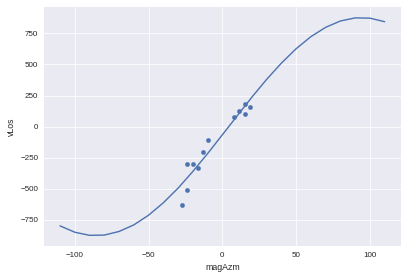

In [9]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
for la in numpy.arange( minLat, maxLat+1, gridSizeMLAT*2 ):
    for ml in numpy.arange( minnormMLT, maxnormMLT+1, gridSizenormMLT*2 ):
        dfSel = velsDataDF[ (velsDataDF["MLAT"] >= la - gridSizeMLAT) &\
                              (velsDataDF["MLAT"] < la + gridSizeMLAT) &\
                            (velsDataDF["normMLT"] >= ml - gridSizenormMLT) &\
                              (velsDataDF["normMLT"] < ml + gridSizenormMLT)]
        if ( (ml == 0) and (la == 59.5) ) :
            if dfSel.shape[0] >= 5:
                print dfSel
                popt, pcov = scipy.optimize.curve_fit(vel_sine_func, \
                        dfSel['magAzm'].T,\
                        dfSel['vLos'].T,
                       p0=initGuess)
                print "Vmax--->", popt[0],"+/-", pcov[0,0]**0.5
                print "delTheta--->", popt[1],"+/-", pcov[1,1]**0.5
                thetaArr = range(-110, 120, 10)
                vLosArr = [ round( model_func(t, popt[0],popt[1]) ) for t in thetaArr ]
                ax.plot( thetaArr, vLosArr )
                dfSel.plot( x="magAzm", y="vLos", kind="scatter", ax=ax )

58.5 1.0 58.25 58.75 0.5 1.5
     beam  range  geoAzm  azimCalcMag  magAzm      vLos     MLAT     MLT  \
218     7     21   39.42      33.9852   25.99  615.7123  58.6628  0.5540   
227     8     22   42.66      37.9424   29.82  703.5563  58.7117  0.6463   
236     9     23   45.90      41.8928   33.68  461.4401  58.6937  0.7400   
243    10     24   49.14      45.8289   37.57  389.2800  58.6067  0.8342   
248    11     25   52.38      49.7419   41.48  362.9501  58.4493  0.9279   
249    11     26   52.38      50.4223   41.81  305.6590  58.7206  0.9737   
349    12     27   55.62      54.3214   45.74  290.4995  58.4676  1.0676   
350    12     28   55.62      55.0251   46.11  265.7351  58.7103  1.1160   
362    13     29   58.86      58.8914   50.06  285.1427  58.3594  1.2085   
363    13     30   58.86      59.6137   50.47  237.0563  58.5719  1.2590   
376    14     32   62.10      64.1621   54.83  230.1657  58.3033  1.4003   
377    14     33   62.10      64.9025   55.28  224.6428  58

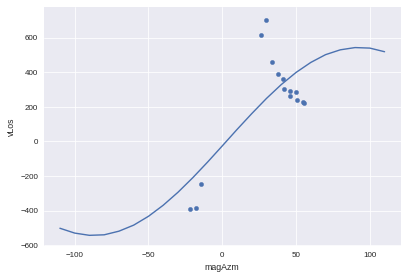

In [10]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
mlatCellSizeArr = [ 0.25 ]
mltCellSizeArr = [ .5 ]
for la in numpy.arange( minLat, maxLat+1, 0.5 ):
    for ml in numpy.arange( minnormMLT, maxnormMLT+1, 1. ):
        if (la != 58.5) or (ml != 1):
            continue
        for csLat in mlatCellSizeArr:
            for csMlt in mltCellSizeArr:
                print la, ml, la - csLat, la + csLat, ml - csMlt, ml + csMlt
                dfSel = velsDataDF[ (velsDataDF["MLAT"] >= la - csLat) &\
                                      (velsDataDF["MLAT"] < la + csLat) &\
                                    (velsDataDF["normMLT"] >= ml - csMlt) &\
                                      (velsDataDF["normMLT"] < ml + csMlt)]
                print dfSel
                popt, pcov = scipy.optimize.curve_fit(vel_sine_func, \
                        dfSel['magAzm'].T,\
                        dfSel['vLos'].T,
                       p0=initGuess)
                print "Vmax--->", popt[0],"+/-", pcov[0,0]**0.5
                print "delTheta--->", popt[1],"+/-", pcov[1,1]**0.5
                thetaArr = range(-110, 120, 10)
                vLosArr = [ round( model_func(t, popt[0],popt[1]) ) for t in thetaArr ]
                ax.plot( thetaArr, vLosArr )
                dfSel.plot( x="magAzm", y="vLos", kind="scatter", ax=ax )
fig1.savefig("../figs/test.pdf",bbox_inches='tight')

In [11]:
la = 58.5
ml = 1.
csLat = 0.25
csMlt = 0.5
dfTest = velsDataDF[ (velsDataDF["MLAT"] >= la - csLat) &\
                                      (velsDataDF["MLAT"] < la + csLat) &\
                                    (velsDataDF["normMLT"] >= ml - csMlt) &\
                                      (velsDataDF["normMLT"] < ml + csMlt)]
minAzim = int( 5 * round(dfTest["magAzm"].min()-1/5) )
maxAzim = int( 5 * round(dfTest["magAzm"].max()+1/5) )
azimBins = [ i for i in range(minAzim, maxAzim+1, 5) ]

velsAzimWiseBins = pandas.cut( dfTest["magAzm"], bins=azimBins )
dfTest["magAzimBin"] = pandas.cut( dfTest["magAzm"], bins=azimBins )
print dfTest[ ["magAzimBin", "magAzm", "vLos", "beam", "radCode"] ]
azmGrpMean = dfTest.groupby( ["magAzimBin"] ).mean().reset_index()
print azmGrpMean

     magAzimBin  magAzm      vLos  beam radCode
218    (25, 30]   25.99  615.7123     7     cve
227    (25, 30]   29.82  703.5563     8     cve
236    (30, 35]   33.68  461.4401     9     cve
243    (35, 40]   37.57  389.2800    10     cve
248    (40, 45]   41.48  362.9501    11     cve
249    (40, 45]   41.81  305.6590    11     cve
349    (45, 50]   45.74  290.4995    12     cve
350    (45, 50]   46.11  265.7351    12     cve
362    (50, 55]   50.06  285.1427    13     cve
363    (50, 55]   50.47  237.0563    13     cve
376    (50, 55]   54.83  230.1657    14     cve
377    (55, 60]   55.28  224.6428    14     cve
402  (-25, -20]  -22.02 -388.8879    14     fhw
406  (-20, -15]  -18.03 -383.5984    15     fhw
409  (-15, -10]  -14.15 -248.1580    16     fhw
      magAzimBin  beam  range  geoAzm  azimCalcMag  magAzm      vLos  \
0   (-110, -105]   NaN    NaN     NaN          NaN     NaN       NaN   
1   (-105, -100]   NaN    NaN     NaN          NaN     NaN       NaN   
2    (-100, -95]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
